In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AE8VoHLaPNEjT_R_ll4BZa0G8ucShBXaFTPa1znm2FTQiAnXJm3BOo
Mounted at /content/drive


In [2]:
!pip install pycm

     |████████████████████████████████| 61kB 4.2MB/s 
     |████████████████████████████████| 552kB 9.1MB/s 


In [3]:
#packages
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from scipy import ndimage
import cv2
from PIL import Image
from pathlib import Path
import os, sys
import glob
import pycm
from pycm import *

Loading images

In [4]:
IMG_WIDTH = 512
IMG_HEIGHT = 1024
IMG_CHANNELS = 1

# paths to image folders 
GT_path='/content/drive/My Drive/Colab Notebooks/interobserver/GT'
inter_path='/content/drive/My Drive/Colab Notebooks/interobserver/interobserver'
intra_path='/content/drive/My Drive/Colab Notebooks/interobserver/intraobserver'


In [5]:
# reading images 
# fuction return values of images as array [number of images, image_height, image_width, img_channels]

def load_data (path1, path2, path3, total=75):
  m=os.listdir(path1) 
  img1 = np.zeros((total, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
  img2 = np.zeros((total, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
  img3 = np.zeros((total, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
  for i in range (0, total):
   sample1 = cv2.imread(path1 + '/' + m[i], 0) 
   img1[i] = np.reshape(sample1, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
   sample2 = cv2.imread(path2 + '/' + m[i], 0) 
   img2[i] = np.reshape(sample2, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
   sample3 = cv2.imread(path3 + '/' + m[i], 0) 
   img3[i] = np.reshape(sample3, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
  return img1, img2, img3

In [41]:
GT_images, inter_images, intra_images = load_data (GT_path, inter_path, intra_path, total=75)

Plotting images
- cheking if everything is ok

In [7]:
# colour definition
black = np.array([0, 0, 0, 255])
white = np.array([255, 255, 255, 255])
yellow = np.array([255, 255, 0, 255])
red = np.array([255, 0, 0, 255]) 
blue = np.array([0, 0, 255, 255])
light_blue = np.array([0, 255, 255, 255])
green = np.array([0, 255, 0, 255])
pink = np.array([255, 0, 255, 255]) 

# function which trasform mask values 0,1,2,3,4,5,6,7 into colours
def num_to_colors (mask, height, width):
    col_mask = np.zeros((height, width, 4))
    for j in range (0,width):
        for i in range (0,height):
            if (mask[i,j]==0):
                col_mask[i,j]=black
            elif (mask[i,j]==1):
                col_mask[i,j]= red
            elif (mask[i,j]==2):
                col_mask[i,j]=yellow
            elif (mask[i,j]==3):
                col_mask[i,j]=green
            elif (mask[i,j]==4):
                col_mask[i,j]=blue
            elif (mask[i,j]==5):
                col_mask[i,j]=light_blue
            elif (mask[i,j]==6):
                col_mask[i,j]=pink
            elif (mask[i,j]==7):
                col_mask[i,j]=white
           
    return col_mask


Image id: 21 scan (31).png



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


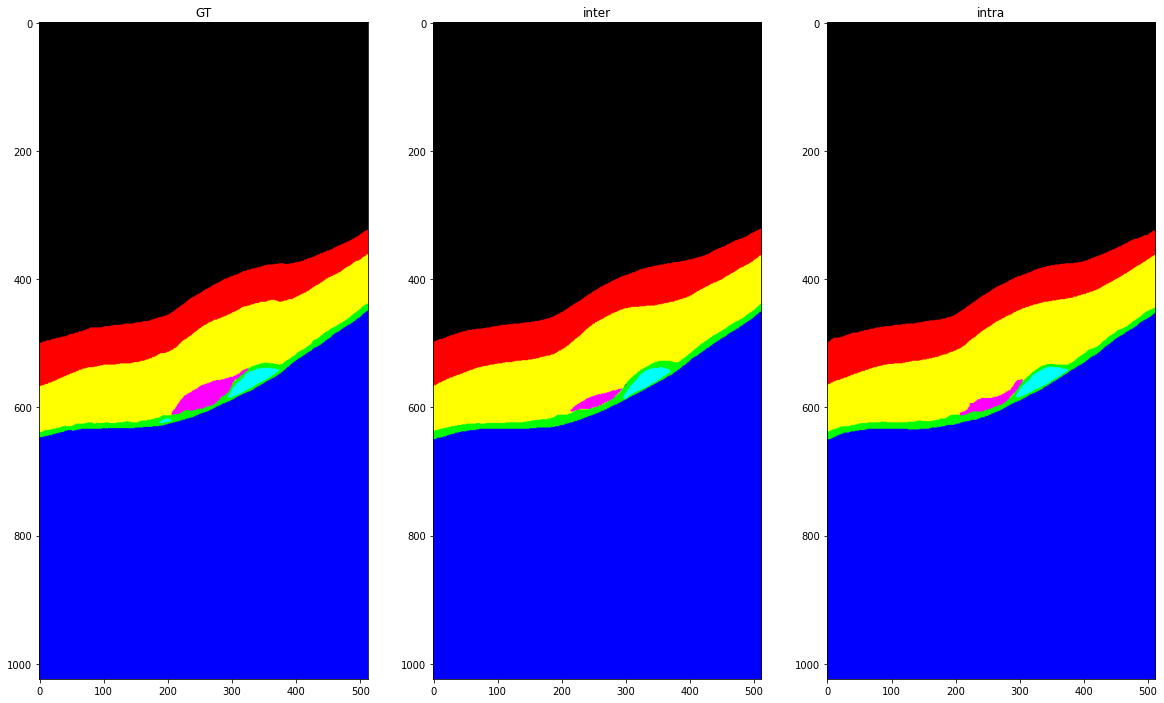

In [42]:
#plotting images
m=os.listdir(GT_path)
i = np.random.randint(0, 75)
print('Image id:',i ,  m[i])
print()
plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
plt.title('GT')
mask1 = np.reshape(GT_images[i], (IMG_HEIGHT, IMG_WIDTH))
mask1 = num_to_colors (mask1, IMG_HEIGHT, IMG_WIDTH)
plt.imshow(mask1)
plt.subplot(1, 3, 2)
plt.title('inter')
mask2 = np.reshape(inter_images[i], (IMG_HEIGHT, IMG_WIDTH))
mask2 = num_to_colors (mask2, IMG_HEIGHT, IMG_WIDTH)
plt.imshow(mask2)
plt.subplot(1, 3, 3)
plt.title('intra')
mask3 = np.reshape(intra_images[i], (IMG_HEIGHT, IMG_WIDTH))
mask3 = num_to_colors (mask3, IMG_HEIGHT, IMG_WIDTH)
plt.imshow(mask3)
plt.show()


In [43]:
GT_vector=GT_images[0].flatten()
for k  in range(1,75):
    GT_vector=np.concatenate((GT_vector, GT_images[k].flatten()), axis=0)


In [44]:
print(np.shape(GT_vector))
print(75*1024*512)

(39321600,)
39321600


In [11]:
inter_vector=inter_images[0].flatten()
for k  in range(1,75):
    inter_vector=np.concatenate((inter_vector, inter_images[k].flatten()), axis=0)

In [45]:
intra_vector=intra_images[0].flatten()
for k  in range(1,75):
    intra_vector=np.concatenate((intra_vector, intra_images[k].flatten()), axis=0)

In [46]:
cm = ConfusionMatrix(actual_vector=GT_vector, predict_vector=intra_vector)

In [47]:
cm.classes

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]

In [15]:
#print(cm)

In [16]:
#cm.print_matrix()

In [17]:
#cm.print_normalized_matrix()

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
import seaborn as sns
cf_matrix = confusion_matrix(GT_vector, intra_vector)

In [50]:
#print(cf_matrix)

In [52]:
cf_matrix_normal = cf_matrix.astype('float32') / cf_matrix.sum(axis=1)[:, np.newaxis]
#print(cf_matrix_normal )

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.2f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [55]:
cm = ConfusionMatrix(actual_vector=GT_vector, predict_vector=intra_vector)


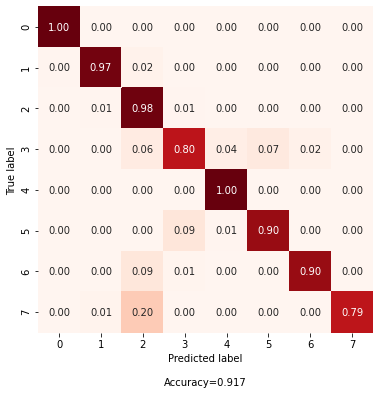

In [56]:
make_confusion_matrix(cf_matrix_normal, count = True, percent = False, figsize=(6,6), cbar=False, cmap='Reds')

In [57]:
from sklearn.metrics import f1_score
print(f1_score(GT_vector, intra_vector, labels=[0,1,2,3,4,5,6,7], average=None))

[0.99814454 0.9732892  0.9701093  0.77833826 0.99846495 0.91212065
 0.92357765 0.84358962]


In [66]:
from sklearn.metrics import f1_score
dice = np.zeros((75,1))
for i in range(0,75):
  GT_vector=GT_images[i].flatten()
  intra_vector=intra_images[i].flatten()
  dice[i] = f1_score(GT_vector, intra_vector, labels=[0], average=None, zero_division=1)
  

print('mean:', np.mean(dice), 'std:', np.std(dice) )


mean: 0.997781124508196 std: 0.0026087700570804643


In [ ]:
#cm = ConfusionMatrix(actual_vector=GT_vector, predict_vector=intra_vector)

In [28]:
#print(cm)
